Packages required

In [26]:
import pandas as pd
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import scipy.stats

from scipy.stats import normaltest

import cartopy as cr
import cartopy.feature as cf
import cartopy.crs as ccrs

Spatial plot of climatology of minimum value of daily maximum temperature

In [5]:
df_india  =xr.open_dataset('./Data/future_a_india.nc')
#df_india

c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


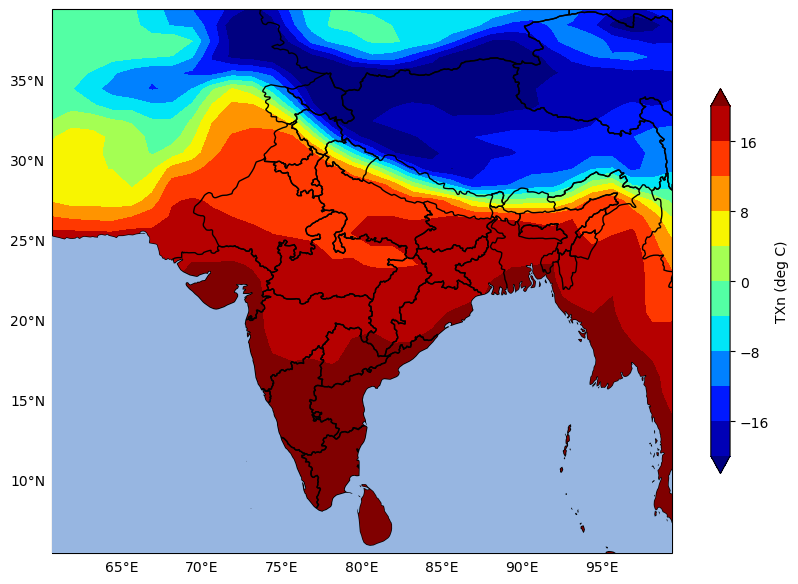

In [53]:
df_india_txn = np.mean(df_india['txnETCCDI'],axis=(0))

lon = df_india_txn.lon; lat = df_india_txn.lat
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

color = np.linspace(-20,20,11)
mp = ax.contourf(lon,lat,df_india_txn,extend = 'both',cmap='jet',levels=color,vmin=-20,vmax=20)
#mp = ax.imshow(df_india_txn,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='jet',origin='lower')

ax.add_feature(cf.LAND)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.OCEAN,zorder = 100)
ax.add_feature(cf.STATES)

cbar = fig.colorbar(mp, shrink=0.5,label='TXn (deg C)')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                    linewidth=2, color='gray', alpha=0, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

#plt.title("Spatial plot of climatology of minimum value of \n daily maximum temperature over \n(60E-100E, 5-40N)")

Spatial trend of minimum value of daily maximum temperature

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf
import pandas as pd
import cartopy as cart
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from sklearn.linear_model import LinearRegression
import numpy as np
from shapely import geometry

In [10]:
df_india = xr.open_dataset('./Data/future_a_india.nc')
df_india

<xarray.Dataset>
Dimensions:    (time: 86, bnds: 2, lon: 32, lat: 35)
Coordinates:
  * time       (time) object 2015-07-02 00:00:00 ... 2100-07-02 00:00:00
  * lon        (lon) float64 60.62 61.88 63.13 64.38 ... 95.62 96.88 98.12 99.38
  * lat        (lat) float64 5.5 6.5 7.5 8.5 9.5 ... 35.5 36.5 37.5 38.5 39.5
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    txnETCCDI  (time, lat, lon) float32 ...
Attributes: (12/55)
    CDI:                      Climate Data Interface version 1.9.3 (http://mp...
    history:                  Fri Apr 14 03:46:29 2023: cdo sellonlatbox,60,1...
    source:                   GFDL-CM4 (2018): \naerosol: interactive\natmos:...
    institution:              National Oceanic and Atmospheric Administration...
    Conventions:              CF-1.7 CMIP-6.0 UGRID-1.0
    external_variables:       areacella
    ...                       ...
    ETCCDI_software:          climdex.pcic
    ETCCDI_software_version:  1.1.9.1
    frequency:                yr
    creation_date:            2019-07-06T08:31:12Z
    title:                    ETCCDI indices computed on NOAA GFDL GFDL-CM4 m...
    CDO:                      Climate Data Operators version 1.9.4rc1 (http:/...

In [11]:
data = df_india.txnETCCDI

nt, nlat, nlon = data.shape
ngrd = nlon*nlat

In [12]:
import scipy.stats as stats
sst_grd4  = np.reshape(data.values,(nt, ngrd))
x = np.arange(2015,2101) #.reshape((nt,1))
sst_rate4 = np.empty((ngrd,1))
sst_rate4[:,:] = np.nan

ppt_rate4 = np.empty((ngrd,1))
ppt_rate4[:,:] = np.nan

for i in range(ngrd): 
    y = sst_grd4[:,i]   
    if(not np.ma.is_masked(y)):         
        
        z = np.polyfit(x,y,1)
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, sst_grd4[:,i])
        sst_rate4[i,0] = slope
        ppt_rate4[i,0] = p_value
    
    
sst_rate4 = np.reshape(sst_rate4,(nlat,nlon))
ppt_rate4 = np.reshape(ppt_rate4,(nlat,nlon))

In [56]:
fig = plt.figure(figsize = (10,10), dpi = 1200)

#bounds=np.linspace(-6,4.5,8)

ax4 = plt.subplot(1,1,1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

lats_post= data.lat.values
lons_post = data.lon.values
s = ppt_rate4 < 0.05
X,Y = np.meshgrid(lons_post,lats_post)

#mp = ax.contourf(lon,lat,df_india_txn,extend = 'both',cmap='jet',levels=color,vmin=-20,vmax=20)
plot1 = ax4.contourf(data.lon,data.lat,sst_rate4,cmap = 'jet',extend = 'both')
#ax.colorbar()


for i in range(len(lats_post)):
    for j in range(len(lons_post)):
        xx, yy = X[i,j], Y[i,j]
        if s[i,j]:
            ax4.plot(xx, yy,'.', markersize=1, c='black')

ax4.add_feature(cf.LAND)
ax4.add_feature(cf.COASTLINE)
ax4.add_feature(cf.OCEAN,zorder = 100)
ax4.add_feature(cf.STATES)
#plt.title('Spatial trend')

cbar = fig.colorbar(plot1, shrink=0.5,label='TXn slope')

gl = ax4.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='gray', alpha=0, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

#cax1= fig.add_axes([1, 0.18, 0.05, 0.6])
#cax1.yaxis.set_tick_params(labelsize=10)
#fig.colorbar(plot1, cax=cax1).set_label(label='PBLH Slope',size=10,weight='bold')

c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


Time series of minimum value of daily maximum temperature

In [15]:
df_india = xr.open_dataset("./Data/future_a_india.nc")
df_north = xr.open_dataset("./Data/future_c_north_india.nc")
df_central = xr.open_dataset("./Data/future_c_central_india.nc")
df_west = xr.open_dataset("./Data/future_c_west_india.nc")
df_east = xr.open_dataset("./Data/future_c_east_india.nc")
df_south = xr.open_dataset("./Data/future_c_south_india.nc")

In [17]:
df_india_txn = np.mean(df_india['txnETCCDI'],axis=(1,2))
df_north_txn = np.mean(df_north['txnETCCDI'],axis=(1,2))
df_central_txn = np.mean(df_central['txnETCCDI'],axis=(1,2))
df_west_txn = np.mean(df_west['txnETCCDI'],axis=(1,2))
df_east_txn = np.mean(df_east['txnETCCDI'],axis=(1,2))
df_south_txn = np.mean(df_south['txnETCCDI'],axis=(1,2))

In [18]:
year = []
for i in range(2015,2101):
    year.append(i)

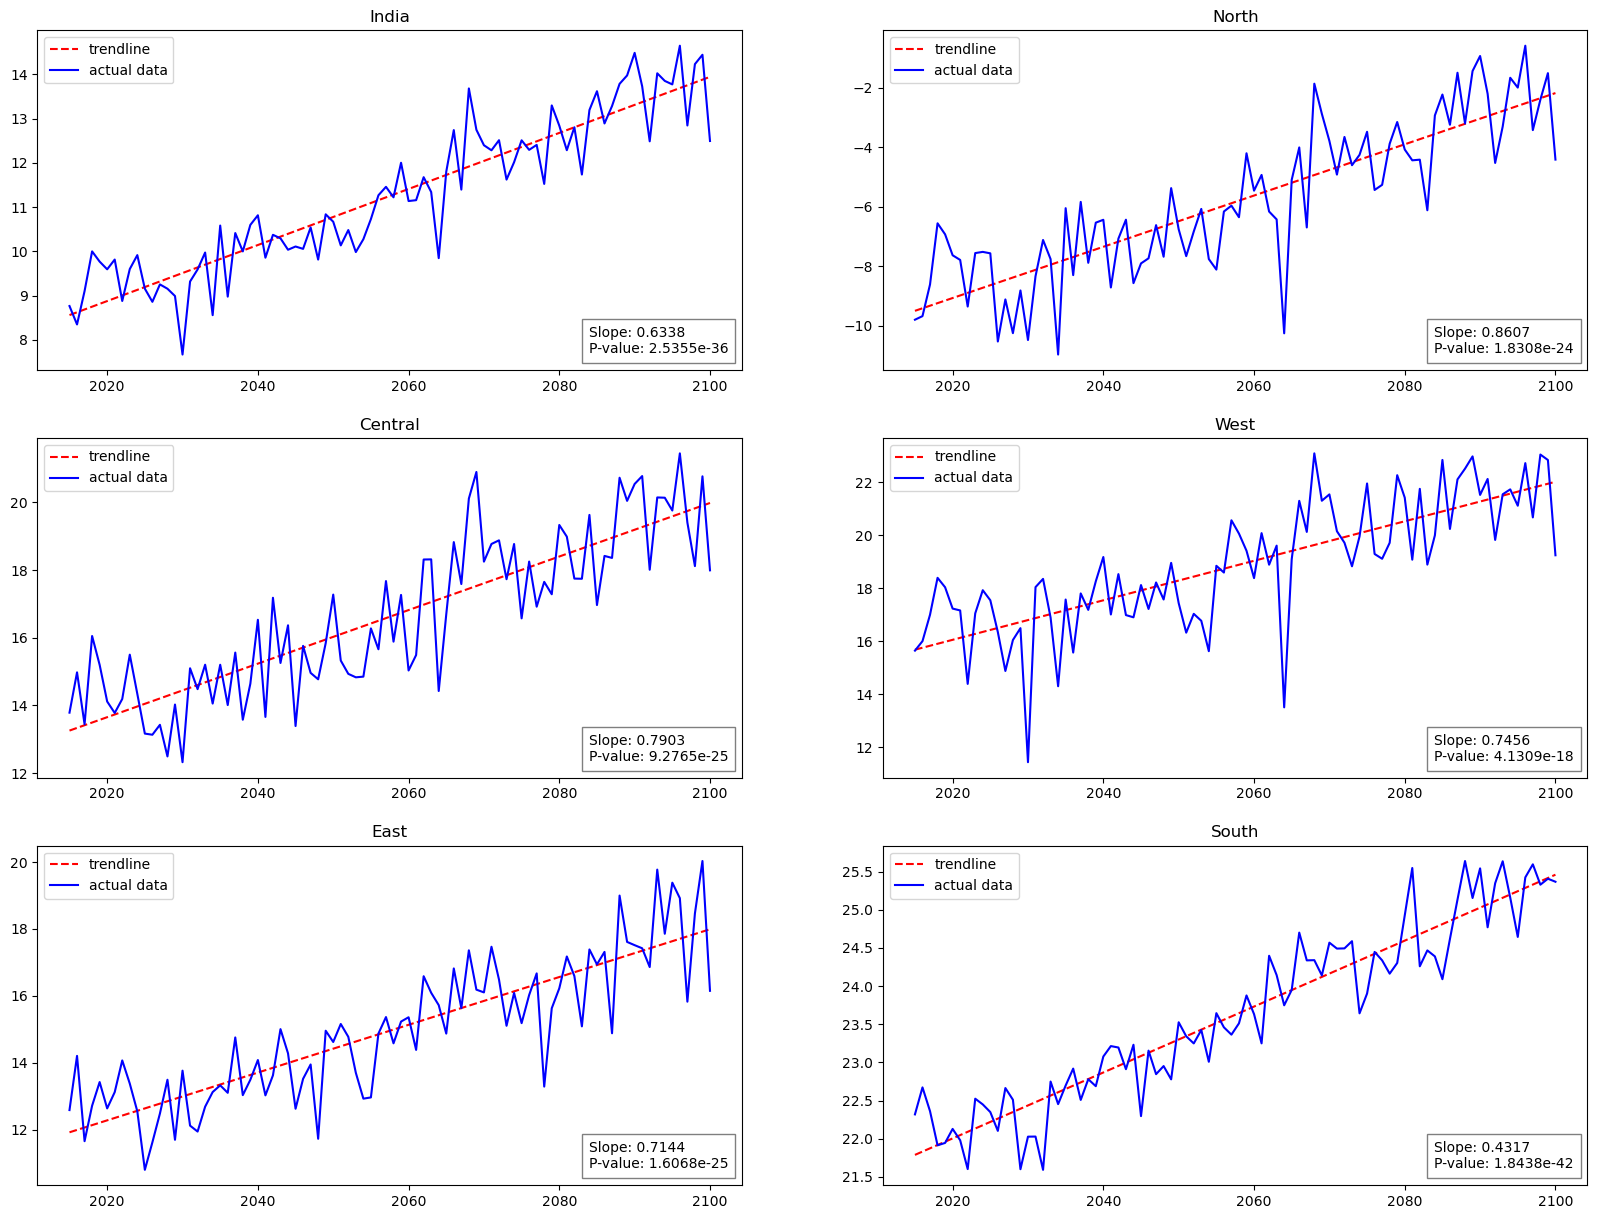

In [39]:
plt.figure(figsize=(20,15))
#dic ={1:df_india_txn,2:df_north_txn,3:df_central_txn,4:df_west_txn,5:df_east_txn,6:df_south_txn}
file = {1:"./Data/future_a_india.nc",2:"./Data/future_c_north_india.nc",3:"./Data/future_c_central_india.nc",
        4:"./Data/future_c_west_india.nc",5:"./Data/future_c_east_india.nc",6:"./Data/future_c_south_india.nc"}
dic1 = {1:'India',2:'North',3:'Central',4:'West',5:'East',6:'South'}

for i in range(1,7):
    plt.subplot(3,2,i)

    df = xr.open_dataset(file[i])
    df = df.txnETCCDI
    df = np.mean(df,axis=(1,2))

    winter_w = {'Time': year, 'VC': df.data}
    win_w = pd.DataFrame(winter_w)

    resultww = scipy.stats.linregress(win_w['Time'],win_w['VC'])
    fitww = win_w['Time'] * resultww[0] + resultww[1]

    plt.plot(year,fitww,'r--',label='trendline')
    plt.plot(year,df,'b',label='actual data')
    #text_box = AnchoredText('slope = ' + str(np.round(resultww[0],3)) + '\n' + 'P-value = ' + str(resultww[3]), frameon=True, loc=4, pad=0.5)
    text_box = AnchoredText(f'Slope: {resultww[0]*10:.4f}\nP-value: {resultww[3]:.4e}', frameon=True, loc=4, pad=0.5)
    plt.setp(text_box.patch, facecolor='white', alpha=0.5)
    plt.gca().add_artist(text_box)
    plt.title(dic1[i])
    plt.legend(loc='upper left')

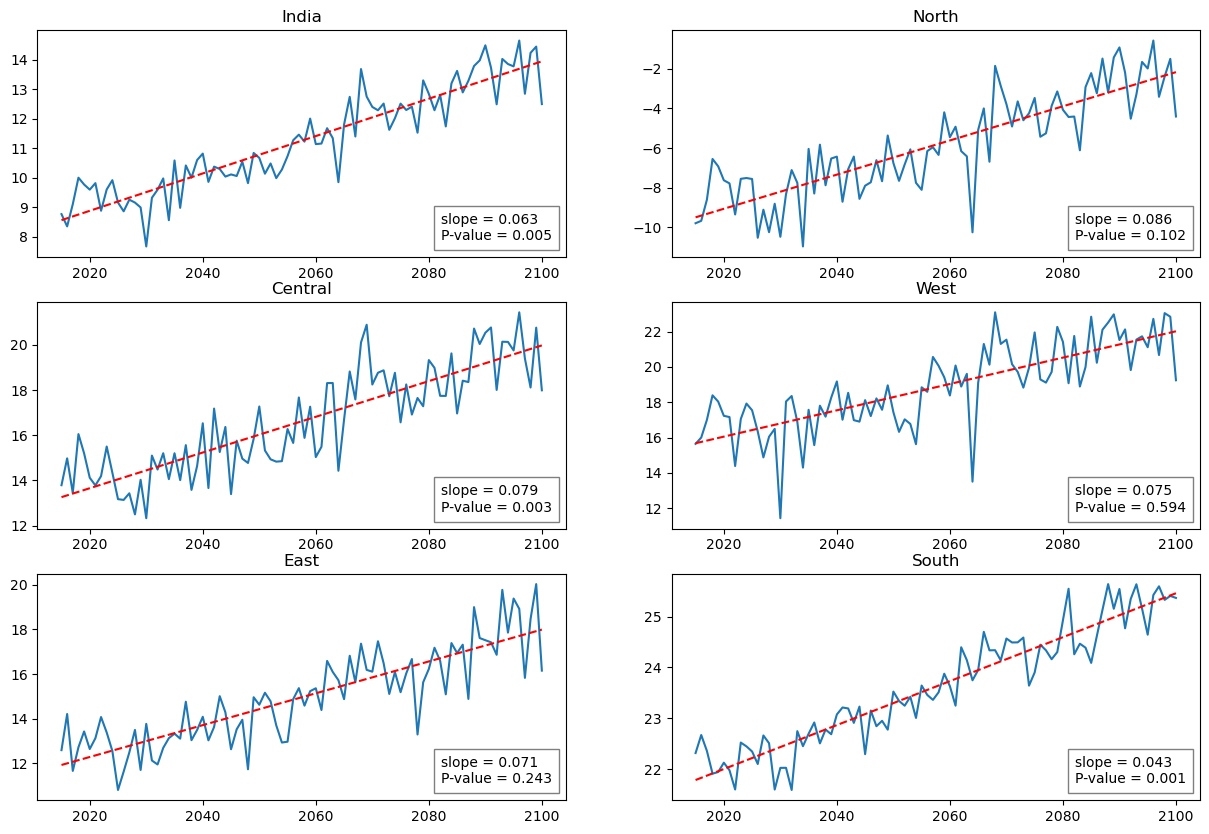

In [21]:
plt.figure(figsize=(15,10))
dic ={1:df_india_txn,2:df_north_txn,3:df_central_txn,4:df_west_txn,5:df_east_txn,6:df_south_txn}
dic1 = {1:'India',2:'North',3:'Central',4:'West',5:'East',6:'South'}
for i in range(1,7):
    plt.subplot(3,2,i)
    plt.plot(year,dic[i])
    coefficients = np.polyfit(range(len(year)), dic[i], 1)
    polynomial = np.poly1d(coefficients)
    trendline = polynomial(range(len(year)))
    
    plt.plot(year, trendline, color='red', linestyle='--', label='Trend Line')
    text_box = AnchoredText('slope = ' + str(np.round(coefficients[0],3)) + '\n' + 'P-value = ' + str(np.round(normaltest(dic[i])[1],3)),
                         frameon=True, loc=4, pad=0.5)
    plt.setp(text_box.patch, facecolor='white', alpha=0.5)
    plt.gca().add_artist(text_box)
    
    plt.title(dic1[i])

Find out the trend (time series from 1851-2100) of given index at Delhi (28° N latitude
to 77° E longitude), Mumbai (19° N latitude - 72°E longitude), Kolkata (22°N latitude and 88°
E longitude).

In [41]:
df_delhi = df_india.sel(lat=28,lon=77,method="nearest")
df_mumbai = df_india.sel(lat=19,lon=72,method='nearest')
df_kolkata = df_india.sel(lat=22,lon=88,method='nearest')
df_bhubaneswar = df_india.sel(lat=20,lon=85,method='nearest')

c:\Users\Akshit Nanda\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([

In [45]:
df_bhubaneswar.data

array([17.957788, 20.229975, 14.202875, 19.427393, 17.709131, 19.586695,
       18.411005, 16.867304, 20.364588, 16.874323, 17.44018 , 15.02923 ,
       17.916895, 16.756403, 18.301508, 18.71673 , 18.190638, 16.941584,
       20.920313, 19.64715 , 16.57522 , 20.715906, 17.830256, 16.11355 ,
       19.78271 , 19.834375, 17.138697, 20.64245 , 19.608759, 23.311243,
       19.385523, 20.801752, 15.513269, 15.937281, 18.983942, 21.052454,
       20.016718, 19.416925, 17.598505, 19.794733, 21.236292, 17.061853,
       20.236658, 18.446955, 21.289545, 20.802729, 18.645288, 21.976557,
       20.656275, 21.66958 , 21.810358, 23.174768, 21.801813, 23.720758,
       20.664637, 21.041315, 23.315607, 22.666193, 19.0841  , 19.150934,
       21.981836, 21.501856, 21.858637, 17.179865, 22.291285, 25.393702,
       24.225672, 17.59704 , 20.237055, 21.921045, 19.458857, 23.681543,
       22.44787 , 24.923151, 20.868982, 23.633905, 23.88296 , 21.371576,
       25.842127, 19.023737, 22.976404, 25.0516  , 

In [33]:
year = []
for i in range(2015,2101):
    year.append(i)

In [43]:
df_delhi = df_delhi['txnETCCDI']
df_mumbai =  df_mumbai['txnETCCDI']
df_kolkata = df_kolkata['txnETCCDI']
df_bhubaneswar = df_bhubaneswar['txnETCCDI']

In [46]:
df_bhubaneswar.data

array([17.957788, 20.229975, 14.202875, 19.427393, 17.709131, 19.586695,
       18.411005, 16.867304, 20.364588, 16.874323, 17.44018 , 15.02923 ,
       17.916895, 16.756403, 18.301508, 18.71673 , 18.190638, 16.941584,
       20.920313, 19.64715 , 16.57522 , 20.715906, 17.830256, 16.11355 ,
       19.78271 , 19.834375, 17.138697, 20.64245 , 19.608759, 23.311243,
       19.385523, 20.801752, 15.513269, 15.937281, 18.983942, 21.052454,
       20.016718, 19.416925, 17.598505, 19.794733, 21.236292, 17.061853,
       20.236658, 18.446955, 21.289545, 20.802729, 18.645288, 21.976557,
       20.656275, 21.66958 , 21.810358, 23.174768, 21.801813, 23.720758,
       20.664637, 21.041315, 23.315607, 22.666193, 19.0841  , 19.150934,
       21.981836, 21.501856, 21.858637, 17.179865, 22.291285, 25.393702,
       24.225672, 17.59704 , 20.237055, 21.921045, 19.458857, 23.681543,
       22.44787 , 24.923151, 20.868982, 23.633905, 23.88296 , 21.371576,
       25.842127, 19.023737, 22.976404, 25.0516  , 

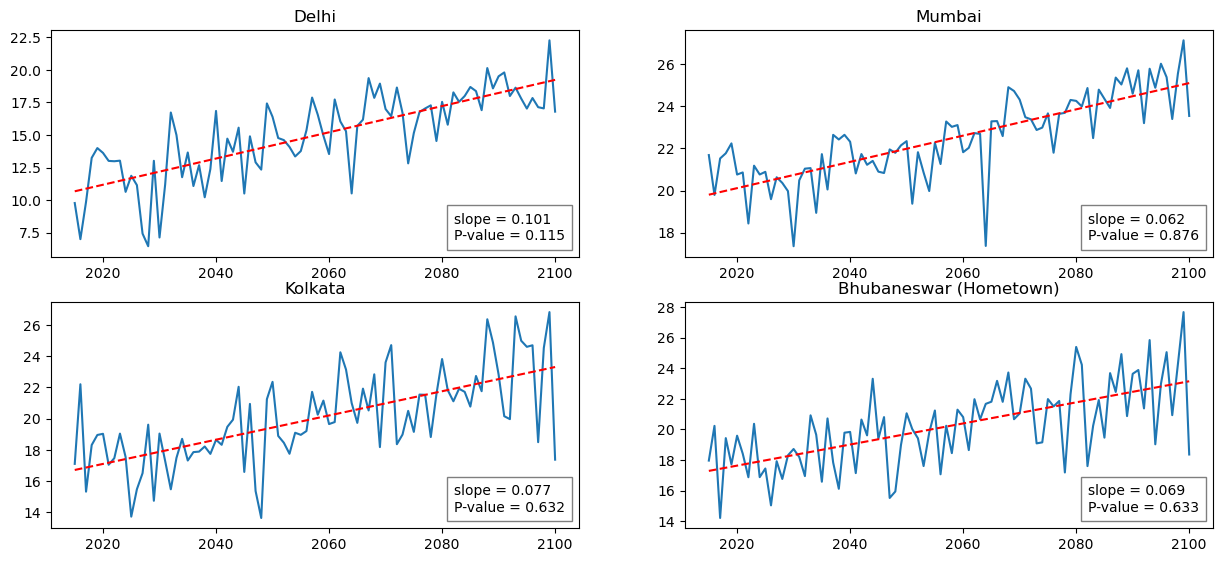

In [39]:
plt.figure(figsize=(15,10))
dic ={1:df_delhi,2:df_mumbai,3:df_kolkata,4:df_bhubaneswar}
dic1 = {1:'Delhi',2:'Mumbai',3:'Kolkata',4:'Bhubaneswar (Hometown)'}
for i in range(1,5):
    plt.subplot(3,2,i)
    plt.plot(year,dic[i])
    coefficients = np.polyfit(range(len(year)), dic[i], 1)
    polynomial = np.poly1d(coefficients)
    trendline = polynomial(range(len(year)))
    
    plt.plot(year, trendline, color='red', linestyle='--', label='Trend Line')
    text_box = AnchoredText('slope = ' + str(np.round(coefficients[0],3)) + '\n' + 'P-value = ' + str(np.round(normaltest(dic[i])[1],3)),
                         frameon=True, loc=4, pad=0.5)
    plt.setp(text_box.patch, facecolor='white', alpha=0.5)
    plt.gca().add_artist(text_box)
    
    plt.title(dic1[i])

In [47]:
dic ={1:df_delhi,2:df_mumbai,3:df_kolkata,4:df_bhubaneswar}

In [48]:
df = dic[1]

In [50]:
df.data

array([ 9.77096  ,  6.9968505,  9.863672 , 13.241663 , 13.993799 ,
       13.622736 , 13.007502 , 12.981989 , 13.025629 , 10.62945  ,
       11.865351 , 11.145807 ,  7.422052 ,  6.454248 , 13.015741 ,
        7.124658 , 11.197992 , 16.72381  , 14.992426 , 11.75445  ,
       13.655176 , 11.076471 , 12.681574 , 10.21258  , 12.387537 ,
       16.846033 , 11.462366 , 14.718073 , 13.709375 , 15.560053 ,
       10.502649 , 14.894526 , 12.896875 , 12.339167 , 17.422663 ,
       16.394007 , 14.765223 , 14.6063175, 14.081812 , 13.34881  ,
       13.762964 , 15.354975 , 17.873438 , 16.559015 , 14.945642 ,
       13.533625 , 17.727839 , 16.036737 , 15.283106 , 10.509302 ,
       15.691797 , 16.177668 , 19.369074 , 17.8518   , 18.94555  ,
       16.989435 , 16.434107 , 18.645258 , 16.692957 , 12.818567 ,
       15.152979 , 16.754663 , 17.03634  , 17.275232 , 14.53747  ,
       17.545893 , 15.786707 , 18.271631 , 17.546625 , 17.99145  ,
       18.686243 , 18.368372 , 16.90359  , 20.140284 , 18.5784

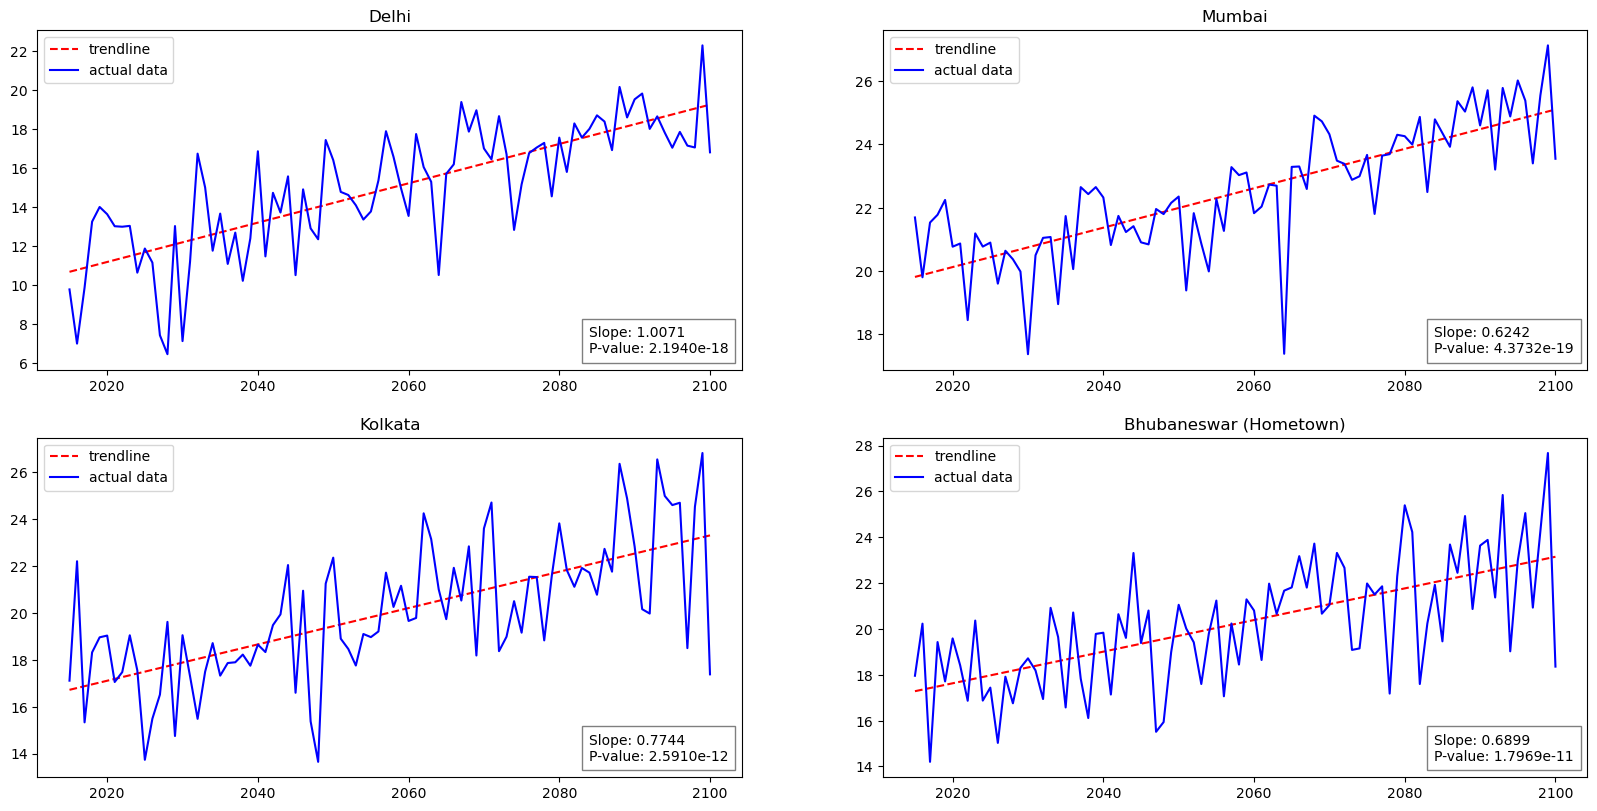

In [55]:
plt.figure(figsize=(20,15))
#dic ={1:df_india_txn,2:df_north_txn,3:df_central_txn,4:df_west_txn,5:df_east_txn,6:df_south_txn}
#file = {1:"./Data/future_a_india.nc",2:"./Data/future_c_north_india.nc",3:"./Data/future_c_central_india.nc",4:"./Data/future_c_west_india.nc",5:"./Data/future_c_east_india.nc",6:"./Data/future_c_south_india.nc"}
#dic1 = {1:'India',2:'North',3:'Central',4:'West',5:'East',6:'South'}

dic ={1:df_delhi,2:df_mumbai,3:df_kolkata,4:df_bhubaneswar}
dic1 = {1:'Delhi',2:'Mumbai',3:'Kolkata',4:'Bhubaneswar (Hometown)'}

for i in range(1,5):
    plt.subplot(3,2,i)
    df = dic[i]
    #df = df.txnETCCDI
    #df = np.mean(df,axis=(1,2))

    winter_w = {'Time': year, 'VC': df.data}
    win_w = pd.DataFrame(winter_w)

    resultww = scipy.stats.linregress(win_w['Time'],win_w['VC'])
    fitww = win_w['Time'] * resultww[0] + resultww[1]

    plt.plot(year,fitww,'r--',label='trendline')
    plt.plot(year,df,'b',label='actual data')
    #text_box = AnchoredText('slope = ' + str(np.round(resultww[0],3)) + '\n' + 'P-value = ' + str(resultww[3]), frameon=True, loc=4, pad=0.5)
    text_box = AnchoredText(f'Slope: {resultww[0]*10:.4f}\nP-value: {resultww[3]:.4e}', frameon=True, loc=4, pad=0.5)
    plt.setp(text_box.patch, facecolor='white', alpha=0.5)
    plt.gca().add_artist(text_box)
    plt.title(dic1[i])
    plt.legend(loc='upper left')

c:\Users\Akshit Nanda\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
C:\Users\Akshit Nanda\AppData\Local\Temp\ipykernel_27312\138769494.py:15: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  tx10p_kolkata['time'] = tx10p_kolkata.indexes['time'].to_datetimeindex()


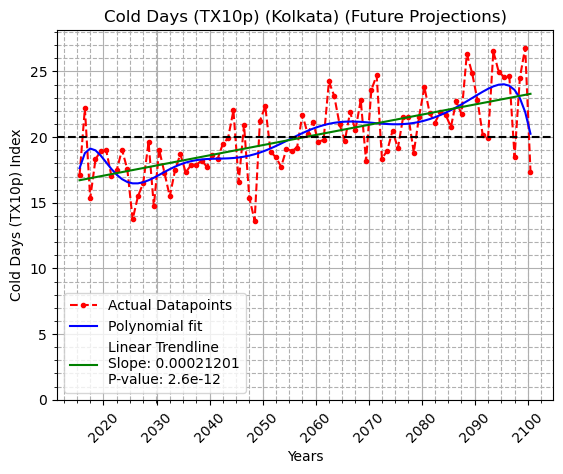

In [25]:
import matplotlib.dates as dates

tx10p_kolkata = xr.open_dataset('./Data/future_a_india.nc')
tx10p_kolkata = tx10p_kolkata['txnETCCDI']

# select a particular latitude and longitude for kolkata
tx10p_kolkata = tx10p_kolkata.sel(lat=22.5726,lon=88.3639,method='nearest')

import pandas as pd
data_mean = tx10p_kolkata.mean().item()
data_std = tx10p_kolkata.std().item()

x = dates.date2num(tx10p_kolkata['time'].values)

tx10p_kolkata['time'] = tx10p_kolkata.indexes['time'].to_datetimeindex()

# Fit a 20-degree polynomial curve to the filtered data
p = np.polyfit(x, tx10p_kolkata, 10)

# Evaluate the curve at each data point
trendline = np.polyval(p, x)

# Plot the actual data points with a red dashed line, trendline with a blue solid line, and bars with height equal to the maximum of the filtered data
max_height = tx10p_kolkata.max()
from scipy.stats import linregress

# Fit a linear trend to the original data
slope, intercept, r_value, p_value, std_err = linregress(x, tx10p_kolkata)

# Evaluate the linear trendline at each data point
linear_trendline = slope * x + intercept

fig, ax = plt.subplots()

ax.plot(tx10p_kolkata['time'], tx10p_kolkata, 'r.--', label='Actual Datapoints')
ax.plot(tx10p_kolkata['time'], trendline, 'b-', label=f'Polynomial fit')
ax.plot(tx10p_kolkata['time'], linear_trendline, 'g-', label=f'Linear Trendline\nSlope: {slope:.8f}\nP-value: {p_value:.1e}')
ax.axhline(y=data_mean, color='black', linestyle='--')
ax.bar(tx10p_kolkata['time'], [max_height]*len(tx10p_kolkata), alpha=0.3, width=1)

ax.set_xlabel('Years')
ax.set_ylabel('Cold Days (TX10p) Index')
ax.set_title('Cold Days (TX10p) (Kolkata) (Future Projections)')
ax.legend()
# Set the x-axis tick labels to be rotated 45 degrees for better readability and add minor gridlines
plt.xticks(rotation=45)
plt.grid(True)
plt.minorticks_on()
plt.grid(which='minor', linestyle='--')

plt.show()